#### Alexei Alves de Souza - 398611
#### Nessa atividade irei utilizar o classificador MLP desenvolvido na cadeira de mineração de dados, o qual é baseado no algoritimo apresentado no livro Python Machine Learning de Sebastian Raschka e Vahid Mirjalili.

In [51]:
# inicializacao
from random import seed
from random import random

def inicializarMLP(n_inputs,n_hidden,n_output):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs+1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden+1)]} for i in range(n_output)]
    network.append(output_layer)
    return network

In [33]:
from math import exp

# Propagação 

# net = sum(weight_i * input_i) + 1*bias

def ativacao(weights,input):
    net = weights[-1]
    for i in range(len(weights)-1):
        net += weights[i]*input[i]
    return net


# f_net 
def f_net(net):
    return 1.0/(1.0 + exp(-net))


# propagação 
def forward_propagate(network,row):
    inputs = row

    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = ativacao(neuron['weights'],inputs)
            neuron['output'] = f_net(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs


# Derivada Sigmoide
def transfer_derivative(y_hat):
    return y_hat * (1.0 - y_hat)


# Backpropagation,erro 
def backward_propagate_error(network,expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i+1]:
                    error += (neuron['weights'][j] * neuron['delta'])  
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                # erro = y - y_hat
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]  
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


# weight = weight + taxa_aprendizagem * erro * input
def atualiza_pesos(network,row, tx_aprend):
    for i in range(len(network)):
        inputs = row[:-3]
        if i!=0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += tx_aprend*neuron['delta']*inputs[j]
            neuron['weights'][-1] += tx_aprend * neuron['delta']
            

#Treinamento
def treinar_rede(network,train, tx_aprend,n_epoch,n_outputs):
    errors = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network,row)
            expected = [0 for i in range(n_outputs)]
            expected[0] = row[-1]
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network,expected)
            atualiza_pesos(network,row, tx_aprend)
        if epoch%10 == 0:
            print('>epoch=%d, txAprend=%.3f, erro=%.3f'%(epoch,tx_aprend,sum_error))
        errors.append(sum_error)
    return errors

#### Carrega a tabela do excel utilizando a lib pandas

In [4]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

In [5]:
dataset = pd.read_excel('Tabela#5.3_RNA.xls')
dataset.head(5)

,x1,x2,x3,d
0,0.0611,0.2860,0.7464,0.4831
1,0.5102,0.7464,0.0860,0.5965
2,0.0004,0.6916,0.5006,0.5318
3,0.9430,0.4476,0.2648,0.6843
4,0.1399,0.1610,0.2477,0.2872


In [67]:
dataset = np.array(dataset)
#inputs = data[:,0:3]
#labels = data[:,3]

### 1) ---->

##### Treino para 100 epocas

In [57]:
MLP1 = inicializarMLP(3,10,1)

In [58]:
errors1= treinar_rede(MLP1,dataset, 0.1,100,1)

>epoch=0, txAprend=0.100, erro=3.444
>epoch=10, txAprend=0.100, erro=3.313
>epoch=20, txAprend=0.100, erro=2.138
>epoch=30, txAprend=0.100, erro=0.411
>epoch=40, txAprend=0.100, erro=0.407
>epoch=50, txAprend=0.100, erro=0.402
>epoch=60, txAprend=0.100, erro=0.398
>epoch=70, txAprend=0.100, erro=0.394
>epoch=80, txAprend=0.100, erro=0.390
>epoch=90, txAprend=0.100, erro=0.385


##### Treino para 200 epocas

In [19]:
MLP2 = inicializarMLP(3,10,1)

In [39]:
errors2= treinar_rede(MLP2,dataset, 0.1,200,1)

>epoch=0, txAprend=0.100, erro=0.373
>epoch=10, txAprend=0.100, erro=0.369
>epoch=20, txAprend=0.100, erro=0.364
>epoch=30, txAprend=0.100, erro=0.360
>epoch=40, txAprend=0.100, erro=0.356
>epoch=50, txAprend=0.100, erro=0.352
>epoch=60, txAprend=0.100, erro=0.348
>epoch=70, txAprend=0.100, erro=0.343
>epoch=80, txAprend=0.100, erro=0.339
>epoch=90, txAprend=0.100, erro=0.335
>epoch=100, txAprend=0.100, erro=0.330
>epoch=110, txAprend=0.100, erro=0.326
>epoch=120, txAprend=0.100, erro=0.321
>epoch=130, txAprend=0.100, erro=0.317
>epoch=140, txAprend=0.100, erro=0.312
>epoch=150, txAprend=0.100, erro=0.308
>epoch=160, txAprend=0.100, erro=0.303
>epoch=170, txAprend=0.100, erro=0.298
>epoch=180, txAprend=0.100, erro=0.294
>epoch=190, txAprend=0.100, erro=0.289


##### Treino para 300 epocas

In [21]:
MLP3 = inicializarMLP(3,10,1)

In [40]:
errors3= treinar_rede(MLP3,dataset, 0.1,300,1)

>epoch=0, txAprend=0.100, erro=0.317
>epoch=10, txAprend=0.100, erro=0.314
>epoch=20, txAprend=0.100, erro=0.311
>epoch=30, txAprend=0.100, erro=0.307
>epoch=40, txAprend=0.100, erro=0.304
>epoch=50, txAprend=0.100, erro=0.300
>epoch=60, txAprend=0.100, erro=0.297
>epoch=70, txAprend=0.100, erro=0.293
>epoch=80, txAprend=0.100, erro=0.290
>epoch=90, txAprend=0.100, erro=0.286
>epoch=100, txAprend=0.100, erro=0.283
>epoch=110, txAprend=0.100, erro=0.279
>epoch=120, txAprend=0.100, erro=0.276
>epoch=130, txAprend=0.100, erro=0.272
>epoch=140, txAprend=0.100, erro=0.269
>epoch=150, txAprend=0.100, erro=0.265
>epoch=160, txAprend=0.100, erro=0.262
>epoch=170, txAprend=0.100, erro=0.259
>epoch=180, txAprend=0.100, erro=0.255
>epoch=190, txAprend=0.100, erro=0.252
>epoch=200, txAprend=0.100, erro=0.249
>epoch=210, txAprend=0.100, erro=0.245
>epoch=220, txAprend=0.100, erro=0.242
>epoch=230, txAprend=0.100, erro=0.239
>epoch=240, txAprend=0.100, erro=0.236
>epoch=250, txAprend=0.100, erro=0.2

##### Treino para 400 epocas

In [48]:
MLP4 = inicializarMLP(3,10,1)

In [49]:
errors4 = treinar_rede(MLP4,dataset, 0.1,400,1);

>epoch=0, txAprend=0.100, erro=3.353
>epoch=10, txAprend=0.100, erro=2.886
>epoch=20, txAprend=0.100, erro=0.436
>epoch=30, txAprend=0.100, erro=0.428
>epoch=40, txAprend=0.100, erro=0.424
>epoch=50, txAprend=0.100, erro=0.420
>epoch=60, txAprend=0.100, erro=0.417
>epoch=70, txAprend=0.100, erro=0.413
>epoch=80, txAprend=0.100, erro=0.409
>epoch=90, txAprend=0.100, erro=0.406
>epoch=100, txAprend=0.100, erro=0.402
>epoch=110, txAprend=0.100, erro=0.398
>epoch=120, txAprend=0.100, erro=0.394
>epoch=130, txAprend=0.100, erro=0.390
>epoch=140, txAprend=0.100, erro=0.386
>epoch=150, txAprend=0.100, erro=0.382
>epoch=160, txAprend=0.100, erro=0.378
>epoch=170, txAprend=0.100, erro=0.374
>epoch=180, txAprend=0.100, erro=0.370
>epoch=190, txAprend=0.100, erro=0.365
>epoch=200, txAprend=0.100, erro=0.361
>epoch=210, txAprend=0.100, erro=0.356
>epoch=220, txAprend=0.100, erro=0.352
>epoch=230, txAprend=0.100, erro=0.347
>epoch=240, txAprend=0.100, erro=0.342
>epoch=250, txAprend=0.100, erro=0.3

##### Treino para 500 epocas

In [25]:
MLP5 = inicializarMLP(3,10,1)

In [42]:
errors5= treinar_rede(MLP5,dataset, 0.1,500,1)

>epoch=0, txAprend=0.100, erro=0.084
>epoch=10, txAprend=0.100, erro=0.083
>epoch=20, txAprend=0.100, erro=0.081
>epoch=30, txAprend=0.100, erro=0.080
>epoch=40, txAprend=0.100, erro=0.079
>epoch=50, txAprend=0.100, erro=0.078
>epoch=60, txAprend=0.100, erro=0.077
>epoch=70, txAprend=0.100, erro=0.076
>epoch=80, txAprend=0.100, erro=0.075
>epoch=90, txAprend=0.100, erro=0.074
>epoch=100, txAprend=0.100, erro=0.073
>epoch=110, txAprend=0.100, erro=0.071
>epoch=120, txAprend=0.100, erro=0.070
>epoch=130, txAprend=0.100, erro=0.069
>epoch=140, txAprend=0.100, erro=0.068
>epoch=150, txAprend=0.100, erro=0.068
>epoch=160, txAprend=0.100, erro=0.067
>epoch=170, txAprend=0.100, erro=0.066
>epoch=180, txAprend=0.100, erro=0.065
>epoch=190, txAprend=0.100, erro=0.064
>epoch=200, txAprend=0.100, erro=0.063
>epoch=210, txAprend=0.100, erro=0.062
>epoch=220, txAprend=0.100, erro=0.061
>epoch=230, txAprend=0.100, erro=0.060
>epoch=240, txAprend=0.100, erro=0.059
>epoch=250, txAprend=0.100, erro=0.0

### 3)---->

In [43]:
import matplotlib.pyplot as plt

#### Plot do gráfico para 400 iterações

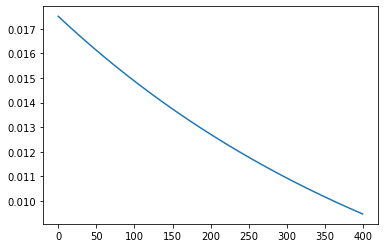

In [47]:
epocas = np.arange(400)

plt.plot(epocas,errors4)

#### Plot do gráfico para 500 iterações

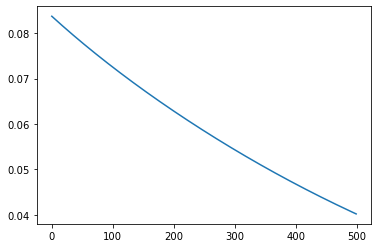

In [50]:
epocas = np.arange(500)

plt.plot(epocas,errors5)

### 5) ---->

#### Para essa questão precisaremos de uma função predict, porém como não é desejado que seja um aplicada uma função de ativação nas saídas irei apenas passar os inputs pera rede e obter seus resultados brutos

In [54]:
def predict_data(network,dataset):
    outputs = []
    for row in dataset:
        row_ = row[:-1]
        outputs.append(forward_propagate(network,row_))
    return outputs

In [81]:
d = dataset[:,3]
d = d.reshape(20,1)

#### A seguir funções para calcular o erro relativo médio e variância com o print das predicoes

In [96]:
y_1= predict_data(MLP1,dataset)
y_1 = np.array(y_1)
mean_error = (1 - (sum(d/y_1))/len(y_1))*100
var = (np.var(d-y_1))*100

print("Predicoes:\n", y_1)
print('Erro Relativo Medio:\n',mean_error[0],'%','\n','Variância:\n',var,'%')

Predicoes:
 [[0.60874784]
 [0.60859766]
 [0.60317656]
 [0.62461054]
 [0.58939824]
 [0.63198373]
 [0.62254175]
 [0.62130614]
 [0.61329885]
 [0.62274781]
 [0.61956328]
 [0.6218762 ]
 [0.58596153]
 [0.62414419]
 [0.60925702]
 [0.63873514]
 [0.62361837]
 [0.6063554 ]
 [0.63135857]
 [0.61307168]]
Erro Relativo Medio:
 2.5631418488733515 % 
 Variância:
 1.8226739564214625 %


In [97]:
y_2= predict_data(MLP2,dataset)
y_2 = np.array(y_2)
mean_error = (1 - (sum(d/y_2))/len(y_2))*100
var = (np.var(d-y_2))*100

print("Predicoes:\n", y_2)
print('Erro Relativo Medio:\n',mean_error[0],'%','\n','Variância:\n',var,'%')

Predicoes:
 [[0.5688626 ]
 [0.62163339]
 [0.56927383]
 [0.66057135]
 [0.55660163]
 [0.64208797]
 [0.62700923]
 [0.59954515]
 [0.63394388]
 [0.60826028]
 [0.60212149]
 [0.65132117]
 [0.54417387]
 [0.65237766]
 [0.57292423]
 [0.6645396 ]
 [0.61605437]
 [0.59431686]
 [0.67097092]
 [0.58520937]]
Erro Relativo Medio:
 2.4143102389466264 % 
 Variância:
 1.366663213083071 %


In [98]:
y_3= predict_data(MLP3,dataset)
y_3 = np.array(y_3)
mean_error = (1 - (sum(d/y_3))/len(y_3))*100
var = (np.var(d-y_3))*100

print("Predicoes:\n", y_3)
print('Erro Relativo Medio:\n',mean_error[0],'%','\n','Variância:\n',var,'%')

Predicoes:
 [[0.53883656]
 [0.62637241]
 [0.53854141]
 [0.69096432]
 [0.52264486]
 [0.65773485]
 [0.63700614]
 [0.58436299]
 [0.64853731]
 [0.60333029]
 [0.58856672]
 [0.67589726]
 [0.50236405]
 [0.67393561]
 [0.54636885]
 [0.69498664]
 [0.60785767]
 [0.57946621]
 [0.70658   ]
 [0.56653623]]
Erro Relativo Medio:
 2.172392351722363 % 
 Variância:
 1.0539752599241008 %


In [101]:
y_4= predict_data(MLP4,dataset)
y_4 = np.array(y_4)
mean_error = (1 - (sum(d/y_4))/len(y_4))*100
var = (np.var(d-y_4))*100

print("Predicoes:\n", y_4)
print('Erro Relativo Medio:\n',mean_error[0],'%','\n','Variância:\n',var,'%')

Predicoes:
 [[0.56864474]
 [0.61507798]
 [0.57040715]
 [0.65625859]
 [0.54147097]
 [0.64601814]
 [0.62104756]
 [0.60553029]
 [0.62243418]
 [0.60829876]
 [0.60777608]
 [0.64627917]
 [0.53273854]
 [0.65383501]
 [0.5705012 ]
 [0.67046384]
 [0.62467676]
 [0.59345395]
 [0.67209266]
 [0.58240332]]
Erro Relativo Medio:
 2.3047131524116415 % 
 Variância:
 1.248472199419663 %


In [102]:
y_5= predict_data(MLP5,dataset)
y_5 = np.array(y_5)
mean_error = (1 - (sum(d/y_5))/len(y_5))*100
var = (np.var(d-y_5))*100

print("Predicoes:\n", y_5)
print('Erro Relativo Medio:\n',mean_error[0],'%','\n','Variância:\n',var,'%')

Predicoes:
 [[0.4863856 ]
 [0.61389883]
 [0.50377774]
 [0.72467272]
 [0.37349221]
 [0.71464828]
 [0.61421469]
 [0.6161955 ]
 [0.61126979]
 [0.5967218 ]
 [0.62576163]
 [0.6970957 ]
 [0.36143533]
 [0.74302705]
 [0.48363801]
 [0.77759528]
 [0.68976676]
 [0.56980552]
 [0.77777216]
 [0.51564449]]
Erro Relativo Medio:
 1.355304052932882 % 
 Variância:
 0.1943431499383697 %
